# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [1]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [2]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Latacunga'
    solution = 'Cuenca'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Latacunga', 'Quito', 'Cuenca']


# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

# Factor de Ramificación

### Definición 
El factor de ramificación efectivo de un árbol de profundidad d con un total de n nodos, se define como el factor de ramificación de un árbol con un factor constante de ramificación, igual profundidad, e igual n. Un algoritmo de búsqueda se dice que es completo si encuentra una solución en cualquier problema resoluble. Si el algoritmo de búsqueda completo termina sin encontrar una solución, el problema no se puede resolver

Especialmente con grafos muy grandes (posiblemente infinitos), puede ser más práctico describir la complejidad del algoritmo en términos del factor de ramificación. Para encontrar los nodos que están en una distancia **'d'** de la raíz (distancia medida por el número de aristas que tiene que usar), Búsqueda en anchura requiere **O(b(d+1)** en términos computacionales y de memoria, donde **b** es el factor de ramificación del grafo.

**ramificacion tambien se le puede considerar como el numero de profundidad algunos conceptos antes mencionados se pueden ejemplificar en la siguiente imange** 

![Esta es una imagen de ejemplo](http://www.cs.us.es/~fsancho/images/2015-07/96a74992-1529-11e2-bb76-001e670c2818.png)

Para una profundidad d dada con un total de nodos n, el factor de ramificación puede ser calculado resolviendo la siguiente ecuación: 

**Recordemos que hemos despejado de la formula entregada en clases:**    
![Esta es una imagen de ejemplo](https://raw.githubusercontent.com/vlarobbyk/busquedas-ia/master/factorramificacion.png)        

**Despejado d**

![Imagen de formula despejada](https://i.pinimg.com/564x/9c/f3/72/9cf372bc042d441cdd22d30c1c222ef7.jpg) 

##### A continuación mostraremos un **ejemplo** aplicando la formula, tendremos en cuenta el factor de ramificación es constante en esta caso **b = 10** y que el numero de reinas(n) seria **n = 4**;



In [3]:
import math
n = 4
b = 5
#  Resolucion de formula ( n(b-1) +1)

n = pow(pow(n, n), 2)
#n = (pow(n, 2)/((pow(n, 2)) -n)) X 
#n = pow(n, n) 


print("Calculado el valor de n, según formula establecida: "+ str(n))
d = (  (math.log(n*(b-1)+1) ) / (math.log(b)) )-1
print("El Factor de Ramificación es: "+ str(d))

Calculado el valor de n, según formula establecida: 65536
El Factor de Ramificación es: 6.75218041552123


## Practica

#### Implementar un algoritmo que me permita dibujar las conexiones

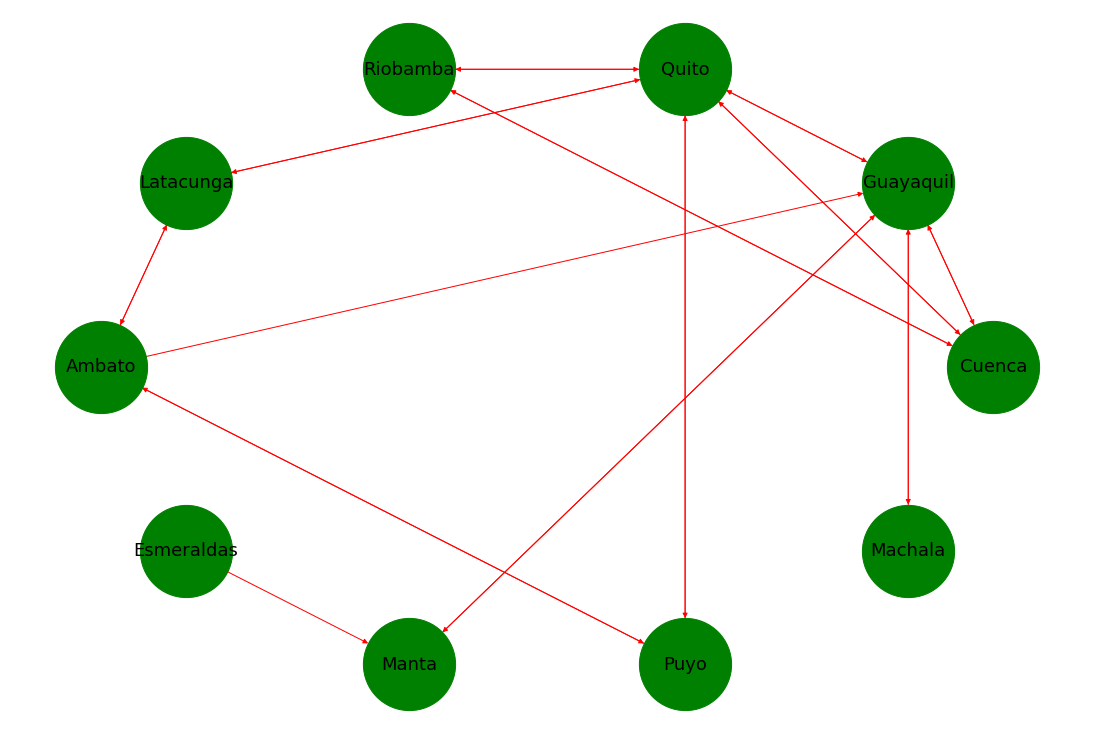

In [15]:
import csv
from os import remove
import networkx as nx
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

connections = {
    'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
    'Latacunga': {'Ambato', 'Quito'},
    'Esmeraldas': {'Manta'},
    'Manta': {'Guayaquil'},
    'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
    'Riobamba': {'Cuenca', 'Quito'},
    'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
    'Puyo': {'Ambato', 'Quito'},
    'Machala': {'Guayaquil'},
    'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'},
}
lista = []
lista.append('origin')
lista.append('destination')

#Metodo llenar las coenciones en lista
def itemsLlave(nombreLlave,llave):
        listaV = connections[llave]
        for i in listaV:
                lista.append(nombreLlave)
                lista.append(i)

def escribriDatos(lista):
    file = open("ciudades.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista)
    file.close()
    
    
for k, i in connections.items():
       itemsLlave(k,k)


    
lista_nueva = []
x = 0
cont = 0
valDividir = False
while x < len(lista):
    if cont== 2:
            escribriDatos(lista_nueva)
            cont = 0
            lista_nueva = []
    if cont != 2:
        lista_nueva.append(lista[x])
        cont=cont+1

    x=x+1

listCiudades = pd.read_csv("ciudades.csv", encoding="ISO-8859–1")
DG=nx.DiGraph()
for row in listCiudades.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"])
    
nx.draw_circular(DG,
                 node_color="green",
                 edge_color="red",
                 font_size=18,
                 width=1, 
                 with_labels=True, 
                 node_size=8500,
)
remove("ciudades.csv")

### resultados del grafo.

['Latacunga', 'Quito', 'Cuenca']


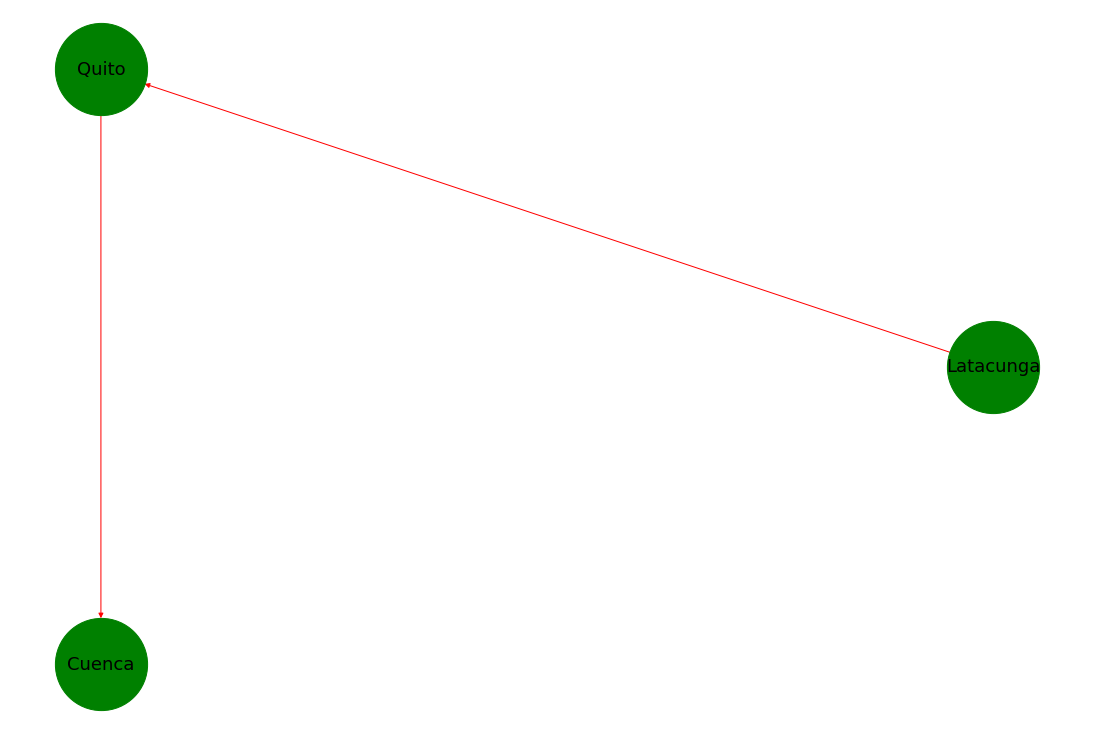

In [10]:
import csv
from os import remove

lista1 = []
lista1.append('origin')
lista1.append('destination')
file = open("ciudades.csv", "a")
spamreader = csv.writer(file)
spamreader.writerow(lista1)
file.close()


lista_nueva = []
x = 0
cont = 0
while x < len(result):
    if cont != 2:
        lista_nueva.append(result[x])
        cont = cont + 1

    if cont == 2:
        escribriDatos(lista_nueva)
        cont = 0
        lista_nueva = []
        x = x -1

    x = x + 1
    
sol_lista = pd.read_csv("ciudades.csv", encoding="ISO-8859–1")
DG=nx.DiGraph()
for row in sol_lista.iterrows():
    DG.add_edge(row[1][0],
                row[1][1])
    
nx.draw_circular(DG,
                 node_color="green",
                 edge_color="red",
                 font_size=18,
                 width=1, 
                 with_labels=True, 
                 node_size=8500,
)

remove("ciudades.csv")
print(result)

### Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


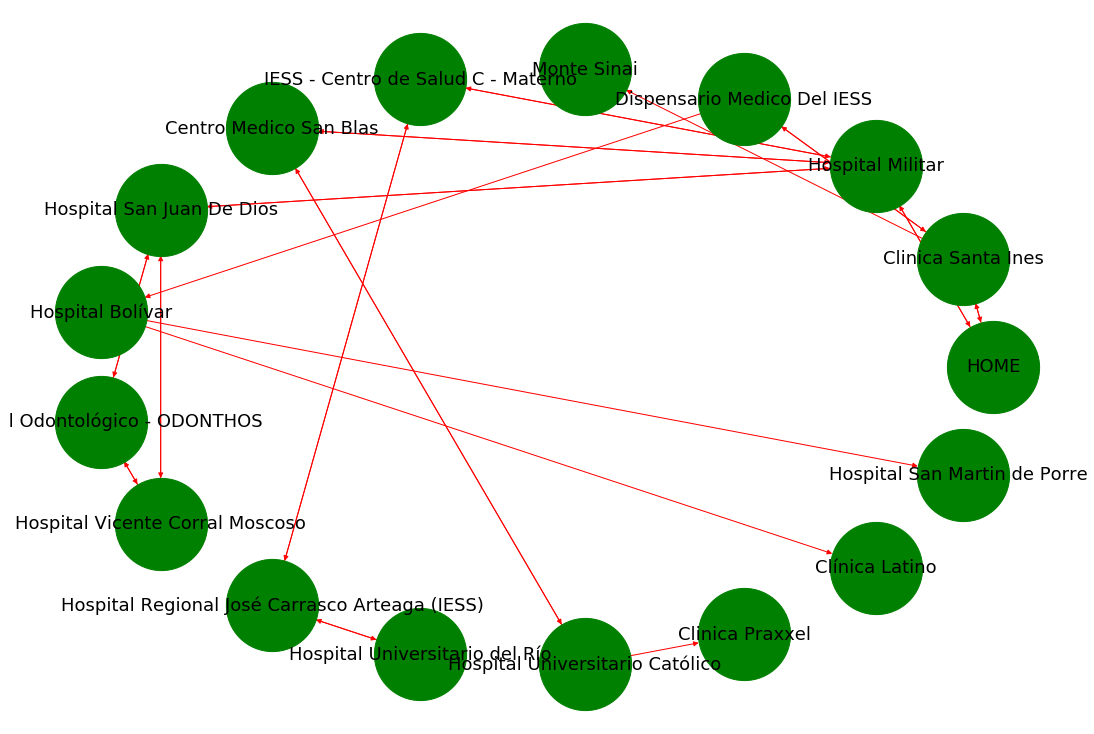

In [18]:
connections = {
    'HOME': {'Clinica Santa Ines', 'Hospital Militar'},
    'Clinica Santa Ines': {'HOME','Monte Sinai', 'Dispensario Medico Del IESS'},
    'Hospital Militar': {'HOME','Hospital San Juan De Dios','IESS - Centro de Salud C - Materno','Centro Medico San Blas'},
    'Dispensario Medico Del IESS': {'Clinica Santa Ines', 'Hospital Bolívar'},
    'Hospital San Juan De Dios': {'Hospital Militar', 'Hospital Vicente Corral Moscoso', 'Hospital Odontológico - ODONTHOS'},
    'IESS - Centro de Salud C - Materno': {'Hospital Militar', 'Hospital Regional José Carrasco Arteaga (IESS)'}, 
    'Hospital Odontológico - ODONTHOS': {'Hospital San Juan De Dios', 'Hospital Vicente Corral Moscoso'},
    'Hospital Vicente Corral Moscoso': {'Hospital Odontológico - ODONTHOS', 'Hospital San Juan De Dios'},
    'Hospital Regional José Carrasco Arteaga (IESS)': {'IESS - Centro de Salud C - Materno','Hospital Universitario del Río'},
    'Hospital Universitario del Río': {'Hospital Regional José Carrasco Arteaga (IESS)'},
    'Centro Medico San Blas': {'Hospital Militar', 'Hospital Universitario Católico'},
    'Hospital Universitario Católico': {'Centro Medico San Blas', 'Clinica Praxxel'},
    'Hospital Bolívar': {'Dispensario Medico Del IESS', 'Hospital San Martin de Porres', 'Clínica Latino'},
}

lista = []
lista.append('origin')
lista.append('destination')

    
for k, i in connections.items():
       itemsLlave(k,k)


    
lista_nueva = []
x = 0
cont = 0
valDividir = False
while x < len(lista):
    if cont== 2:
            escribriDatos(lista_nueva)
            cont = 0
            lista_nueva = []
    if cont != 2:
        lista_nueva.append(lista[x])
        cont=cont+1

    x=x+1

listCiudades = pd.read_csv("ciudades.csv", encoding="ISO-8859–1")
DG=nx.DiGraph()
for row in listCiudades.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"])
    
nx.draw_circular(DG,
                 node_color="green",
                 edge_color="red",
                 font_size=18,
                 width=1, 
                 with_labels=True, 
                 node_size=8500,
)
remove("ciudades.csv")

### Iremos de la casa a Hospital Vicente Corral Moscoso y graficaremos la solucion


['HOME', 'Clinica Santa Ines', 'Monte Sinai', 'Hospital Vicente Corral Moscoso']
['HOME', 'Clinica Santa Ines', 'Monte Sinai', 'Hospital Vicente Corral Moscoso']


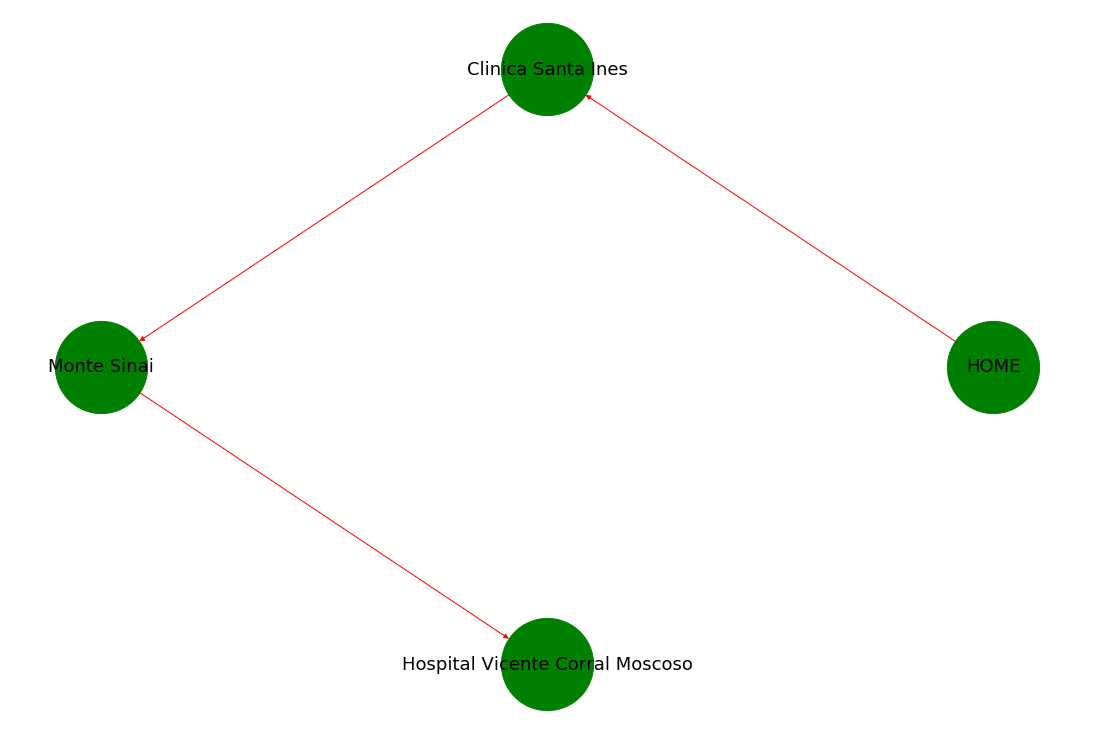

In [26]:
if __name__ == "__main__":
    connections = {
    'HOME': {'Clinica Santa Ines', 'Hospital Militar'},
    'Clinica Santa Ines': {'HOME','Monte Sinai', 'Dispensario Medico Del IESS'},
    'Monte Sinai': {'Clinica Santa Ines','Hospital Vicente Corral Moscoso'},        
    'Hospital Militar': {'HOME','Hospital San Juan De Dios','IESS - Centro de Salud C - Materno','Centro Medico San Blas'},
    'Dispensario Medico Del IESS': {'Clinica Santa Ines', 'Hospital Bolívar'},
    'Hospital San Juan De Dios': {'Hospital Militar', 'Hospital Vicente Corral Moscoso', 'Hospital Odontológico - ODONTHOS'},
    'IESS - Centro de Salud C - Materno': {'Hospital Militar', 'Hospital Regional José Carrasco Arteaga (IESS)'}, 
    'Hospital Odontológico - ODONTHOS': {'Hospital San Juan De Dios', 'Hospital Vicente Corral Moscoso'},
    'Hospital Vicente Corral Moscoso': {'Hospital Odontológico - ODONTHOS', 'Hospital San Juan De Dios','Hospital Vicente Corral Moscoso'},
    'Hospital Regional José Carrasco Arteaga (IESS)': {'IESS - Centro de Salud C - Materno','Hospital Universitario del Río'},
    'Hospital Universitario del Río': {'Hospital Regional José Carrasco Arteaga (IESS)'},
    'Centro Medico San Blas': {'Hospital Militar', 'Hospital Universitario Católico'},
    'Hospital Universitario Católico': {'Centro Medico San Blas', 'Clinica Praxxel'},
    'Hospital Bolívar': {'Dispensario Medico Del IESS', 'Hospital San Martin de Porres', 'Clínica Latino'},
}

    init_state = 'HOME'
    solution = 'Hospital Vicente Corral Moscoso'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

        lista1 = []
lista1.append('origin')
lista1.append('destination')
file = open("ciudades.csv", "a")
spamreader = csv.writer(file)
spamreader.writerow(lista1)
file.close()


lista_nueva = []
x = 0
cont = 0
while x < len(result):
    if cont != 2:
        lista_nueva.append(result[x])
        cont = cont + 1

    if cont == 2:
        escribriDatos(lista_nueva)
        cont = 0
        lista_nueva = []
        x = x -1

    x = x + 1
    
sol_lista = pd.read_csv("ciudades.csv", encoding="ISO-8859–1")
DG=nx.DiGraph()
for row in sol_lista.iterrows():
    DG.add_edge(row[1][0],
                row[1][1])
    
nx.draw_circular(DG,
                 node_color="green",
                 edge_color="red",
                 font_size=18,
                 width=1, 
                 with_labels=True, 
                 node_size=8500,
)

remove("ciudades.csv")
print(result)


# Conclusiones